# Multiple Linear Regression

In [7]:
'''
load Data
'''

import pandas as pd

data =pd.read_csv('mpg.csv')
data.head()

,obs,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,mpg
0,1,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,18.0
1,2,8,350.0,165,3693,11.5,70,buick skylark 320,15.0
2,3,8,318.0,150,3436,11.0,70,plymouth satellite,18.0
3,4,8,304.0,150,3433,12.0,70,amc rebel sst,16.0
4,5,8,302.0,140,3449,10.5,70,ford torino,17.0


In [8]:
'''
#Data exploration see data box and scatter plot,
 look for unbalanced data
#unbalanced variables are when the target
has more observations in a certain predictor than other predictors

'''


from matplotlib import pyplot as plt
fig, ax = plt.subplots(12, 1, figsize=(12,24))

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"  ]

i=0

for feature in features:
    ax[i].boxplot(data[feature], vert=False)
    ax[i].set_ylabel(feature)
    i += 1

    ax[i].scatter(data.mpg, data[feature])
    ax[i].set_ylabel(feature)
    ax[i].set_xlabel('mpg')
    i += 1

# ID
test
# Predictor

# Target

# irrelevant



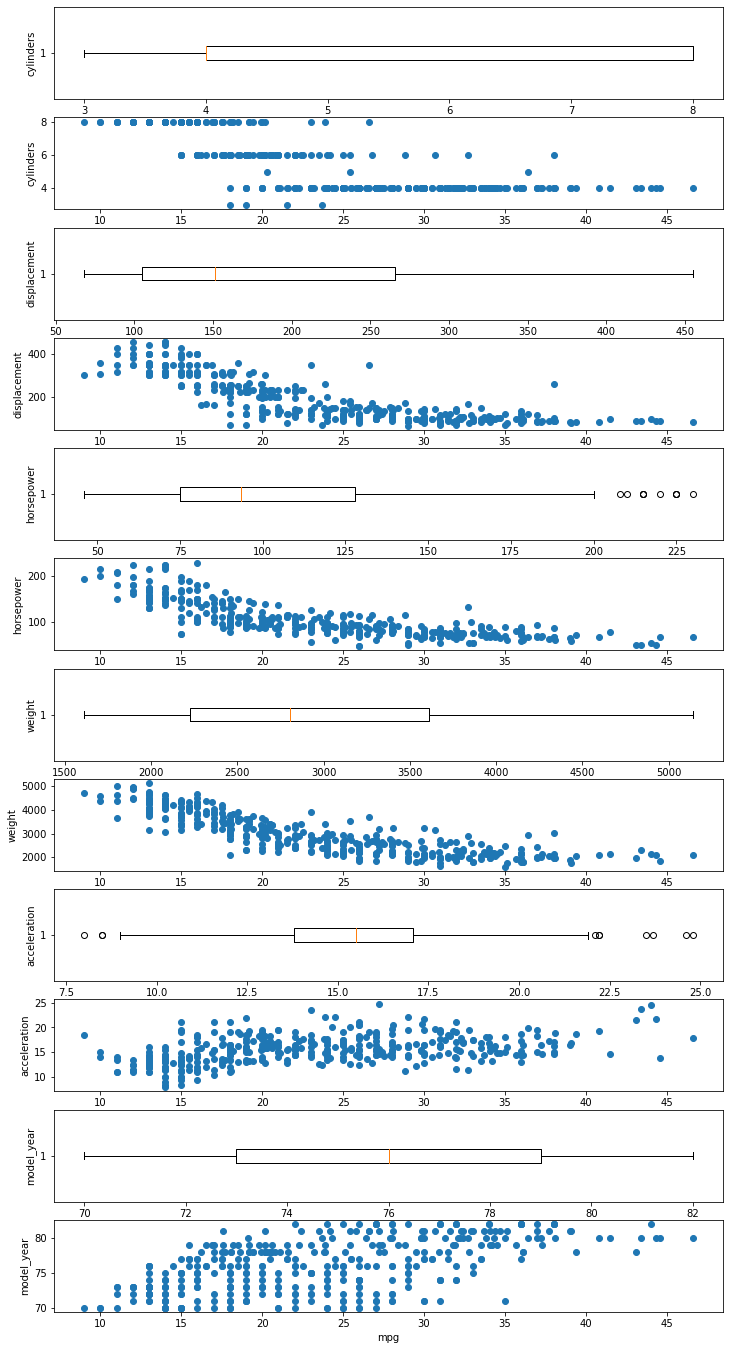

In [9]:
# only go with relevant data
numeric_features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
data[numeric_features + ['mpg']].describe()

In [10]:
'''
plot Mean and median of target
'''

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

label = data['mpg']

fig, ax = plt.subplots(2, 1, figsize=(9,12))

ax[0].hist(label, bins=10)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)#

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('MPG')

fig.suptitle('Overall MPG')

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,5.469543,194.181472,104.477157,2974.959391,15.553807,75.961929,23.443655
std,1.703263,104.490759,38.456886,848.552396,2.758313,3.684238,7.786494
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2223.750000,13.800000,73.000000,17.125000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,265.750000,128.000000,3612.000000,17.075000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


### Analysing the features in more detail

In [ ]:
'''
mean and median of predictor variables
'''
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

## Simple Linear Regression

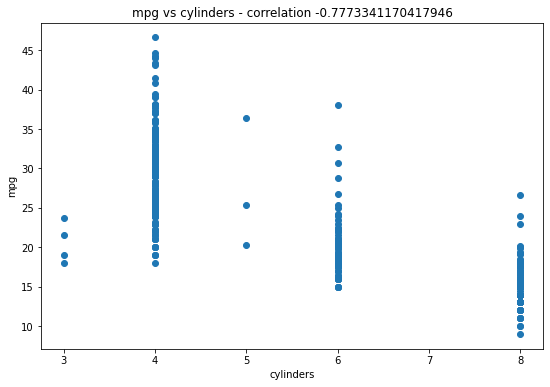

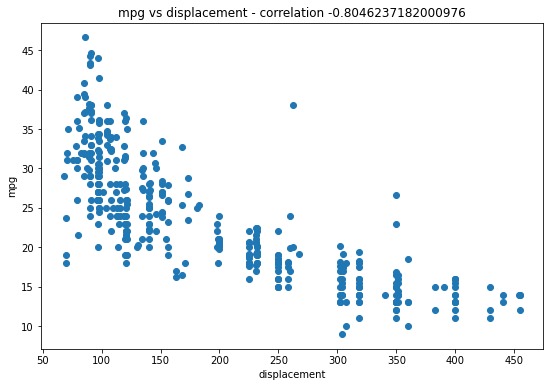

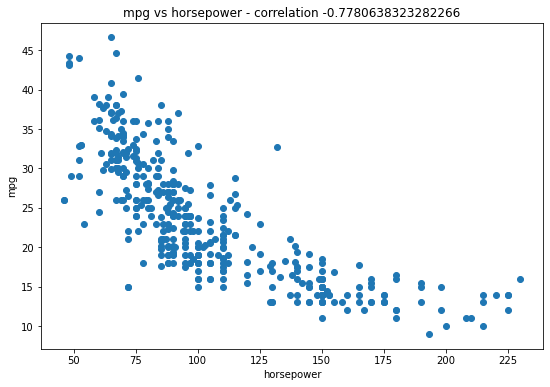

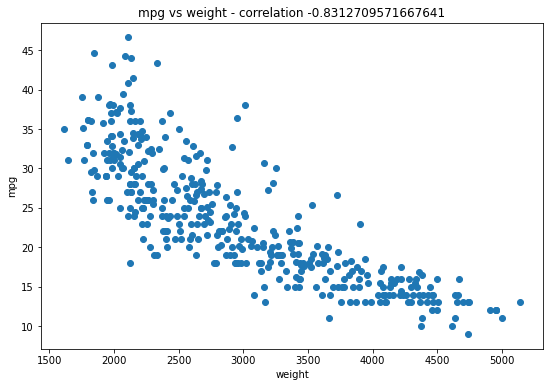

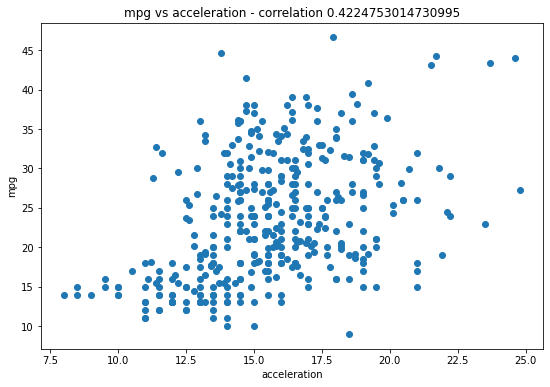

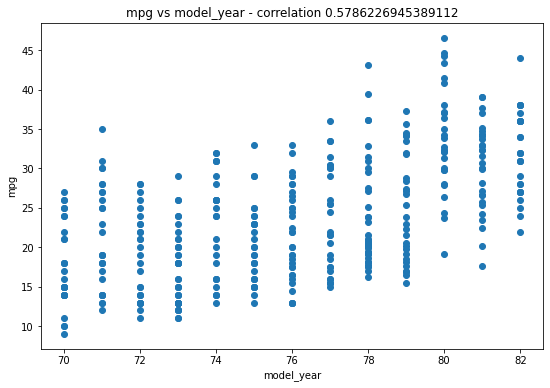

In [11]:
'''
correlation
    pos negative => strong pos > 0.5 => moderately <0.5
'''

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    label = data['mpg']
    corr = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('mpg')
    ax.set_title('mpg vs ' + col + ' - correlation ' + str(corr))

R-Squared for cylinders is 0.60
R-Squared for displacement is 0.65
R-Squared for horsepower is 0.61
R-Squared for weight is 0.69
R-Squared for acceleration is 0.18
R-Squared for model_year is 0.33


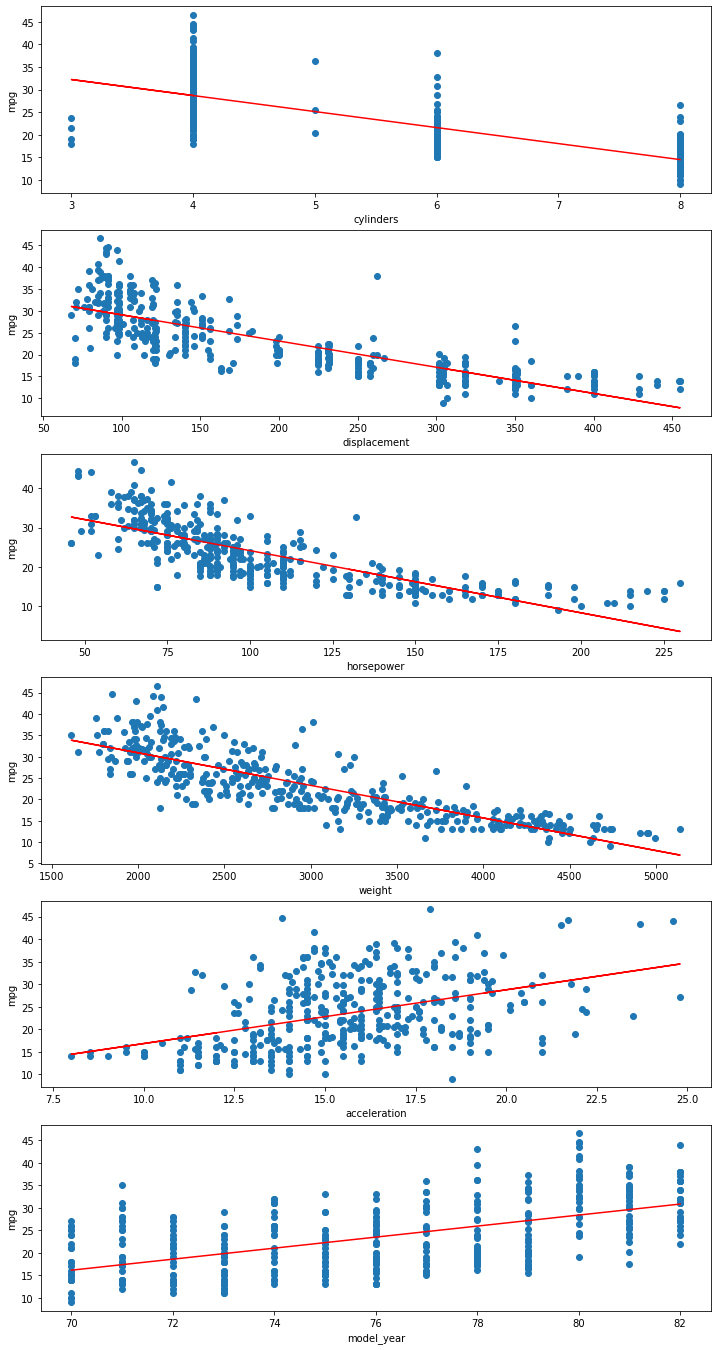

In [12]:
'''
R squared error linear reg model
'''

import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

fig, ax = plt.subplots(6, 1, figsize=(12,24 ))
i=0

for feature in features:
    formula = "mpg ~ " + feature
    model = smf.ols(formula=formula, data=data).fit()
    ax[i].scatter(data[feature], data.mpg)
    ax[i].plot(data[feature], model.fittedvalues, color='red', label="OLS")
    ax[i].set_ylabel('mpg')
    ax[i].set_xlabel(feature)
    i += 1
    print("R-Squared for {} is {:.2f}".format(feature, model.rsquared))


## Multiple Linear Regression

# adjusted Rsquared 0 to 1
# F1 statstic high better
# p value <0.05

In [13]:
formula = "mpg ~ horsepower"
model = smf.ols(formula=formula, data=data).fit()
print (model.rsquared_adj)

0.6043766519915144


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     601.4
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.66e-81
Time:                        09:32:42   Log-Likelihood:                -1184.0
No. Observations:                 394   AIC:                             2372.
Df Residuals:                     392   BIC:                             2380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9027      0.715     55.801      0.000      38.497      41.309
horsepower    -0.1575      0.006    -24.523      0.000      -0.170      -0.145
==============================================================================
Omnibus:                       16.677   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.591
Skew:                           0.494   Prob(JB):                     0.000151
Kurtosis:                       3.306   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
formula = "mpg ~ weight "
model = smf.ols(formula=formula, data=data).fit()
print (model.rsquared_adj)

0.6902231680152473


In [16]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     876.7
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          5.17e-102
Time:                        09:32:42   Log-Likelihood:                -1135.8
No. Observations:                 394   AIC:                             2276.
Df Residuals:                     392   BIC:                             2284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1364      0.797     57.893      0.000      44.570      47.703
weight        -0.0076      0.000    -29.608      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       42.605   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.503
Skew:                           0.736   Prob(JB):                     4.41e-14
Kurtosis:                       4.256   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
formula = "mpg ~ weight + horsepower + cylinders + displacement "
model = smf.ols(formula=formula, data=data).fit()
print (model.rsquared_adj)

0.7035375608791947


In [18]:
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          3.76e-102
Time:                        09:32:43   Log-Likelihood:                -1125.7
No. Observations:                 394   AIC:                             2261.
Df Residuals:                     389   BIC:                             2281.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.7060      1.518     30.118      0.000      42.722      48.690
weight          -0.0052      0.001     -7.322      0.000      -0.007      -0.004
horsepower      -0.0434      0.013     -3.394      0.001      -0.069      -0.018
cylinders       -0.4035      0.409     -0.987      0.324      -1.207       0.400
displacement     0.0003      0.009      0.034      0.973      -0.017       0.018
==============================================================================
Omnibus:                       38.378   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.172
Skew:                           0.704   Prob(JB):                     4.69e-12
Kurtosis:                       4.094   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
formula = "mpg ~ weight + model_year "
model = smf.ols(formula=formula, data=data).fit()
print (model.rsquared_adj)

0.80712613972678


In [20]:
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     823.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          6.88e-141
Time:                        09:32:43   Log-Likelihood:                -1042.0
No. Observations:                 394   AIC:                             2090.
Df Residuals:                     391   BIC:                             2102.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5069      3.976     -3.649      0.000     -22.324      -6.690
weight        -0.0066      0.000    -31.055      0.000      -0.007      -0.006
model_year     0.7591      0.049     15.447      0.000       0.662       0.856
==============================================================================
Omnibus:                       43.260   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.810
Skew:                           0.675   Prob(JB):                     9.38e-17
Kurtosis:                       4.635   Cond. No.                     7.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""